In [1]:
# Import dependencies and Setup
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import w_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


# Generate cities list

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [3]:
#Get API url 
url = "http://api.openweathermap.org/data/2.5/weather?q="
    
    
#See list of cities to get information and lists
#cities 

#Chose Cape Town to see other columns
#response = requests.get(url + "cape town" + "&appid=" + w_key)
#w_city_d = response.json()
#pprint(w_city_d)

# Perform API Calls

Perform a weather check on each city using a series of successive API calls. Include a print log of each city as it's being processed (with the city number and city name).

In [4]:
#Temperature is in Kelvins so change the unit of measurement to F°
units = "imperial"
#Create lists for variables needed
all_cities = []
lat=[]
lng=[]
temp_max=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]

#Create a counter for sucessive API calls
city_count = 0
set_count = 1

In [5]:
# Print things at start of loop 
print("Beginning Data Retrieval")
print("------------------------------")
#Make loop for going trough cities 

for one_city in cities: 
 
    #Add exceptions in loop to avoid it stopping from missing city values 
    try:
        
    #query_url= f'{url}{one_city}&appid={w_key}&units={units}'
        query_url =url + one_city + "&appid=" + w_key +"&units=imperial"
        response = requests.get(query_url).json()
    
    
        city_count = city_count + 1
    #Append data series loop through cities will be used    
        all_cities.append(one_city)
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp_max.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
        if city_count > 50: 
            set_count += 1 
            city_count = 0 
        
        print(f'Processing Record {city_count} of {set_count}|{one_city}')
    
    except(KeyError, IndexError):
        print("City not found. Skipping...")

#Add intervals between queries to stay within API limits 
        time.sleep(2)



#Data retrieval is complete so announce it
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval
------------------------------
City not found. Skipping...
Processing Record 2 of 1|ushuaia
Processing Record 3 of 1|severnoye
Processing Record 4 of 1|barrow
Processing Record 5 of 1|castro
Processing Record 6 of 1|port alfred
Processing Record 7 of 1|mar del plata
Processing Record 8 of 1|marang
Processing Record 9 of 1|zhovti vody
Processing Record 10 of 1|caravelas
Processing Record 11 of 1|yazman
Processing Record 12 of 1|busselton
City not found. Skipping...
Processing Record 14 of 1|torbay
Processing Record 15 of 1|tautira
Processing Record 16 of 1|puerto ayora
Processing Record 17 of 1|cidreira
Processing Record 18 of 1|tura
Processing Record 19 of 1|yellowknife
Processing Record 20 of 1|zhigansk
Processing Record 21 of 1|arraial do cabo
Processing Record 22 of 1|new norfolk
Processing Record 23 of 1|santa cruz de la palma
Processing Record 24 of 1|mataura
Processing Record 25 of 1|lompoc
Processing Record 26 of 1|cape town
Processing Record 27 of 1|leb

Processing Record 30 of 5|katobu
Processing Record 31 of 5|maceio
Processing Record 32 of 5|tiarei
Processing Record 33 of 5|hofn
Processing Record 34 of 5|roela
Processing Record 35 of 5|ust-barguzin
Processing Record 36 of 5|sai buri
Processing Record 37 of 5|amga
Processing Record 38 of 5|pimenta bueno
Processing Record 39 of 5|waingapu
Processing Record 40 of 5|burnie
Processing Record 41 of 5|whitehorse
City not found. Skipping...
Processing Record 43 of 5|cherdyn
Processing Record 44 of 5|tiksi
Processing Record 45 of 5|pulandian
Processing Record 46 of 5|zhoucheng
Processing Record 47 of 5|khatanga
Processing Record 48 of 5|avarua
Processing Record 49 of 5|hithadhoo
Processing Record 50 of 5|kinsale
Processing Record 0 of 6|juan lacaze
Processing Record 1 of 6|sakaiminato
Processing Record 2 of 6|beatrice
Processing Record 3 of 6|codrington
Processing Record 4 of 6|alice springs
Processing Record 5 of 6|japitan
Processing Record 6 of 6|pangkalanbuun
Processing Record 7 of 6|tama

Processing Record 14 of 10|abu samrah
Processing Record 15 of 10|ardakan
Processing Record 16 of 10|abu zabad
Processing Record 17 of 10|tokur
City not found. Skipping...
Processing Record 19 of 10|svetlaya
Processing Record 20 of 10|trairi
City not found. Skipping...
Processing Record 22 of 10|puerto rondon
City not found. Skipping...
City not found. Skipping...
Processing Record 25 of 10|ilulissat
Processing Record 26 of 10|abeche
Processing Record 27 of 10|olafsvik
Processing Record 28 of 10|tailai
Processing Record 29 of 10|lerwick
Processing Record 30 of 10|seoul
Processing Record 31 of 10|zeya
Processing Record 32 of 10|merauke
Processing Record 33 of 10|khandyga
Processing Record 34 of 10|usinsk
Processing Record 35 of 10|sarahan
Processing Record 36 of 10|ingraj bazar
Processing Record 37 of 10|barkhan
Processing Record 38 of 10|pacifica
Processing Record 39 of 10|nchelenge
City not found. Skipping...
Processing Record 41 of 10|paamiut
Processing Record 42 of 10|namatanai
Proce

# Convert Raw Data to DataFrame

Export the city data into a .csv.Display the DataFrame

In [29]:
#Convert to pandas DataFrame (code from class)
weather_dict = ({"City":all_cities,
    "Lat": lat, 
    "Lng": lng,
    "Max Temp": temp_max,
    "Humidity" : humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country, 
    "Date": date
    })

#weather_data = pd.DataFrame(weather_dict)
#weather_data.head()
weather_df = pd.DataFrame.from_dict(weather_dict, orient='index').transpose()
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,taolanaro,-54.8,-68.3,39.2,93,75,21.85,AR,1619652120
1,ushuaia,56.3491,78.3619,44.17,86,100,10.29,RU,1619652355
2,severnoye,71.2906,-156.789,21.2,86,90,10.36,US,1619652356
3,barrow,-24.7911,-50.0119,53.91,85,15,3.29,BR,1619652356
4,castro,-33.5906,26.891,66.27,79,98,7.18,ZA,1619652126


In [8]:
print(weather_df.dtypes)

City          object
Lat           object
Lng           object
Max Temp      object
Humidity      object
Cloudiness    object
Wind Speed    object
Country       object
Date          object
dtype: object


In [9]:
#Clean dataframe (several NAs)
weather_df = weather_df.dropna(how= "any")

In [10]:
weather_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [11]:
#Export city data into a csv 
filename = "cities.csv"
weather_df.to_csv("../output/cities.csv", index=False, header=True)



Inspect the data and remove the cities where the humidity > 100%.

In [30]:
#Something is weird with describe
weather_df.describe()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
count,611,556.0000,556.0000,556.0,556,556,556.00,556,556
unique,611,554.0000,556.0000,342.0,90,91,272.00,116,313
top,la ronge,67.4667,-1.1494,77.0,88,100,4.61,RU,1619652428
freq,1,2.0000,1.0000,15.0,28,72,34.00,71,4


In [12]:
#Get the indices of cities that have humidity over 100%.
weather_df["Humidity"].max()

100

Max humidity is not over 100% so we don't need to clean data. 

# Plotting the Data

Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

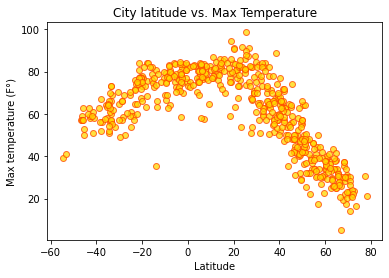

In [24]:
#Create variables 
latitude_p = weather_df["Lat"]
temp_p= weather_df["Max Temp"]
humidity_p=weather_df["Humidity"]
cloud_p=weather_df["Cloudiness"]
wind_sp = weather_df["Wind Speed"]

#Create scatterplot 
plt.scatter(latitude_p, temp_p, marker="o", facecolors="gold", edgecolors="orangered",
             alpha=0.75)
#Add title and labels to scatter plot 
plt.title( "City latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max temperature (F°)")

#Create png image 
plt.savefig("sp_latitude_vs_maxtemp.png")


### Latitude vs. Humidity Plot

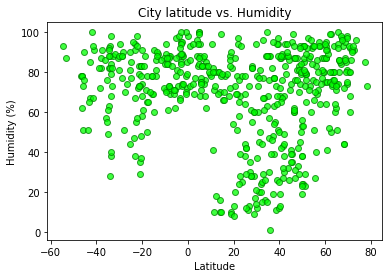

In [25]:
#Create scatterplot 
plt.scatter(latitude_p, humidity_p, marker="o", facecolors="lime", edgecolors="green",
             alpha=0.75)
#Add title and labels to scatter plot 
plt.title( "City latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Save figure
plt.savefig("sp_latitude_vs_humidity.png")

### Latitude vs. Cloudiness Plot

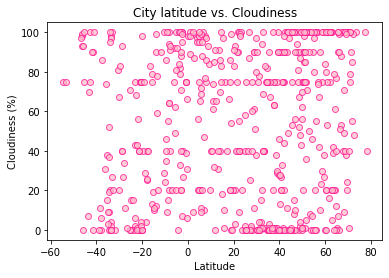

In [26]:
#Create scatterplot 
plt.scatter(latitude_p, cloud_p, marker="o", facecolors="pink", edgecolors="deeppink",
             alpha=0.75)
#Add title and labels to scatter plot 
plt.title( "City latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#Figure 
plt.savefig("sp_latitude_vs_Cloudiness.png")

### Latitude vs. Wind Speed Plot

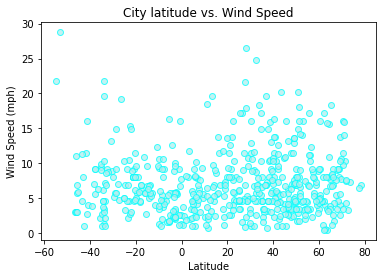

In [27]:
#Create scatterplot 
plt.scatter(latitude_p, wind_sp, marker="o", facecolors="paleturquoise", edgecolors="cyan",
             alpha=0.75)
#Add title and labels to scatter plot 
plt.title( "City latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#Make figure 
plt.savefig("sp_latitude_vs_wind.png")

## Linear Regression

In [41]:
#Change dataframe types 
#Everything is an object so change values to what they have to be 
weather_df["Lat"] = weather_df["Lat"].astype(float)
weather_df["Lng"] = weather_df["Lng"].astype(float)
weather_df["Max Temp"] = weather_df["Max Temp"].astype(float)
weather_df["Humidity"] = weather_df["Humidity"].astype(float)
weather_df["Cloudiness"] = weather_df["Cloudiness"].astype(float)
weather_df["Wind Speed"] = weather_df["Wind Speed"].astype(float)

In [42]:
#Make a group for the north hemisphere and the south hemisphere 
north_hem = weather_df[weather_df['Lat'] > 0]
south_hem= weather_df[weather_df['Lat'] < 0]

In [43]:
#Check both dataframes to see if they work 
north_hem.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,ushuaia,56.3491,78.3619,44.17,86.0,100.0,10.29,RU,1619652355
2,severnoye,71.2906,-156.7887,21.20,86.0,90.0,10.36,US,1619652356
6,mar del plata,5.2056,103.2059,77.00,94.0,20.0,4.61,MY,1619652357
7,marang,48.3473,33.5003,42.80,70.0,0.0,4.47,UA,1619652358
9,caravelas,29.1212,71.7446,87.21,17.0,51.0,10.74,PK,1619652359
11,busselton,47.6666,-52.7314,41.00,81.0,90.0,11.50,CA,1619652343
15,puerto ayora,25.5198,90.2201,73.71,42.0,0.0,3.49,IN,1619652364
16,cidreira,62.4560,-114.3525,25.00,50.0,20.0,17.27,CA,1619652087
17,tura,66.7697,123.3711,25.92,84.0,88.0,1.74,RU,1619652364
20,arraial do cabo,28.6835,-17.7642,69.80,60.0,90.0,5.28,ES,1619652366


In [44]:
north_hem["Max Temp"]

1      44.17
2      21.20
6      77.00
7      42.80
9      87.21
       ...  
548    48.00
550    38.98
551    46.99
552    34.43
555    38.28
Name: Max Temp, Length: 386, dtype: float64

In [46]:
#south_hem.head()
print(south_hem.dtypes)


City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Country        object
Date           object
dtype: object


#### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.88
The r-squared is: 0.773871921180902
y = -0.93x + 93.87


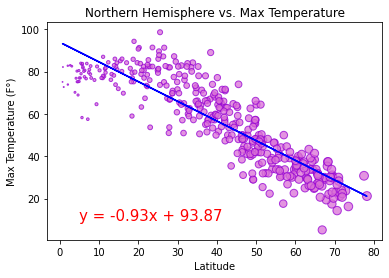

In [53]:
#Create values for regression and correlation graphs 
#north_lat = north_hem["Lat"]
#north_temp =north_hem["Max Temp"]

# Equations for correlation and regression

correlation = st.pearsonr(north_hem["Lat"], north_hem["Max Temp"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem["Lat"], north_hem["Max Temp"])
regress_values = north_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Use the same scatterplot made before 
#Change colors 
plt.scatter(north_hem["Lat"], north_hem["Max Temp"], marker="o", facecolors="orchid", edgecolors="darkviolet",
            s=north_hem["Lat"], alpha=0.75)
plt.plot(north_hem["Lat"],regress_values,"b-")


#Add title and labels to scatter plot 
plt.title( "Northern Hemisphere vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F°)")

plt.annotate(line_eq,(5,10),fontsize=15,color="red")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.73
The r-squared is: 0.5399873711500075
y = 0.55x + 80.61


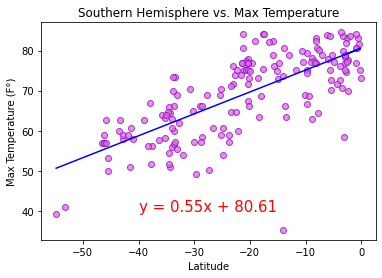

In [62]:
# Equations for correlation and regression

correlation = st.pearsonr(south_hem["Lat"], south_hem["Max Temp"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem["Lat"], south_hem["Max Temp"])
regress_values = south_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Use the same scatterplot made before 
#Change colors 
plt.scatter(south_hem["Lat"], south_hem["Max Temp"], marker="o", facecolors="orchid", edgecolors="darkviolet",
            s= None, alpha=0.75)
plt.plot(south_hem["Lat"],regress_values,"b-")


#Add title and labels to scatter plot 
plt.title( "Southern Hemisphere vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F°)")

plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

#### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.16
The r-squared is: 0.024470049440580923
y = 0.2x + 59.0


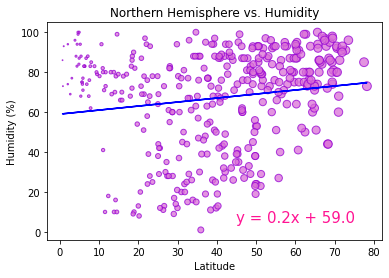

In [90]:
# Equations for correlation and regression

correlation = st.pearsonr(north_hem["Lat"], north_hem["Humidity"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem["Lat"], north_hem["Humidity"])
regress_values = north_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Use the same scatterplot made before 
#Change colors 
plt.scatter(north_hem["Lat"], north_hem["Humidity"], marker="o", facecolors="orchid", edgecolors="darkviolet",
            s=north_hem["Lat"], alpha=0.75)
plt.plot(north_hem["Lat"],regress_values,"b-")


#Add title and labels to scatter plot 
plt.title( "Northern Hemisphere vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.annotate(line_eq,(45,5),fontsize=15,color="deeppink")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

#### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.13
The r-squared is: 0.016716912936495753
y = 0.14x + 79.78


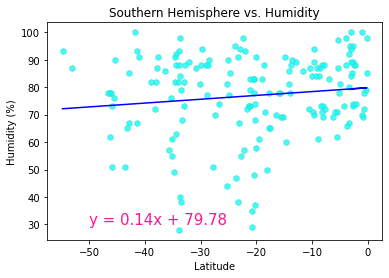

In [86]:
# Equations for correlation and regression

correlation = st.pearsonr(south_hem["Lat"], south_hem["Humidity"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem["Lat"], south_hem["Humidity"])
regress_values = south_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Use the same scatterplot made before 
#Change colors 
plt.scatter(south_hem["Lat"], south_hem["Humidity"], marker="h", facecolors="cyan", edgecolors="turquoise",
            s= None, alpha=0.75)
plt.plot(south_hem["Lat"],regress_values,"b-")


#Add title and labels to scatter plot 
plt.title( "Southern Hemisphere vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.annotate(line_eq,(-50,30),fontsize=15,color="deeppink")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

#### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.04
The r-squared is: 0.0016432319051720072
y = 0.08x + 50.61


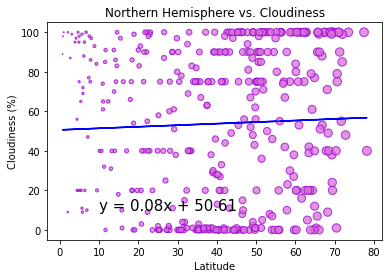

In [93]:

correlation = st.pearsonr(north_hem["Lat"], north_hem["Cloudiness"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem["Lat"], north_hem["Cloudiness"])
regress_values = north_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
#Change colors 
plt.scatter(north_hem["Lat"], north_hem["Cloudiness"], marker="o", facecolors="orchid", edgecolors="darkviolet",
            s=north_hem["Lat"], alpha=0.75)
plt.plot(north_hem["Lat"],regress_values,"b-")

#Add title and labels to scatter plot 
plt.title( "Northern Hemisphere vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.annotate(line_eq,(10,10),fontsize=15,color="black")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

#### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.1
The r-squared is: 0.010344194196741905
y = 0.27x + 53.77


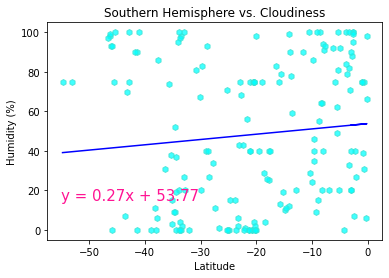

In [94]:
correlation = st.pearsonr(south_hem["Lat"], south_hem["Cloudiness"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem["Lat"], south_hem["Cloudiness"])
regress_values = south_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Use the same scatterplot made before 
#Change colors 
plt.scatter(south_hem["Lat"], south_hem["Cloudiness"], marker="h", facecolors="cyan", edgecolors="turquoise",
            s= None, alpha=0.75)
plt.plot(south_hem["Lat"],regress_values,"b-")


#Add title and labels to scatter plot 
plt.title( "Southern Hemisphere vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.annotate(line_eq,(-55,15),fontsize=15,color="deeppink")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

#### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.08
The r-squared is: 0.006615572186023897
y = 0.02x + 6.34


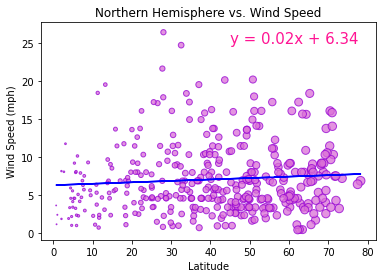

In [97]:

correlation = st.pearsonr(north_hem["Lat"], north_hem["Wind Speed"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem["Lat"], north_hem["Wind Speed"])
regress_values = north_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
#Change colors 
plt.scatter(north_hem["Lat"], north_hem["Wind Speed"], marker="o", facecolors="orchid", edgecolors="darkviolet",
            s=north_hem["Lat"], alpha=0.75)
plt.plot(north_hem["Lat"],regress_values,"b-")

#Add title and labels to scatter plot 
plt.title( "Northern Hemisphere vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.annotate(line_eq,(45,25),fontsize=15,color="deeppink")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

#### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.23
The r-squared is: 0.05495459849837929
y = -0.07x + 5.23


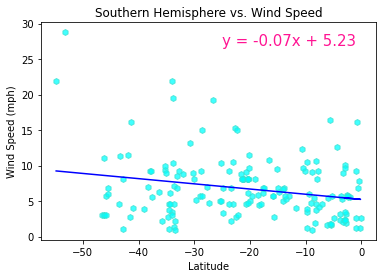

In [103]:
# Equations for correlation and regression

correlation = st.pearsonr(south_hem["Lat"], south_hem["Wind Speed"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem["Lat"], south_hem["Wind Speed"])
regress_values = south_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Use the same scatterplot made before 
#Change colors 
plt.scatter(south_hem["Lat"], south_hem["Wind Speed"], marker="h", facecolors="cyan", edgecolors="turquoise",
            s= None, alpha=0.75)
plt.plot(south_hem["Lat"],regress_values,"b-")


#Add title and labels to scatter plot 
plt.title( "Southern Hemisphere vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.annotate(line_eq,(-25,27),fontsize=15,color="deeppink")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)